# Homework 3

This homework will explore linear regression and resampling techniques by analysing data from a database of glaciers. The database is *Glatilda* for [*Glacier Ice Thickness Database*](!https://www.gtn-g.ch/data_catalogue_glathida/).

1. Data prep (5 points)
2. Mapping (10 points)
3. Correlations between parameters (5 points)
4. Linear regression and resampling techniques (10 points)

## 1. Data Prep (5 points total)

### a) Download data (1 point) 
The database is saved on a GitLab repository that you may clone: https://gitlab.com/wgms/glathida.git



In [50]:
import os
os.chdir('/home/jovyan/MLGeo_2022_dpsprink/Data/HW3_data/Glacier_data/')
# git clone https://gitlab.com/wgms/glathida.git

### b) Import Python modules (1 point) 
Import pandas, geopandas, plotting, raster files,  numpy, netcdf

In [51]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio
import numpy as np
import netCDF4
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'vscode'
import io
import requests
import time
from datetime import datetime, timedelta
from folium.plugins import MarkerCluster
from rasterio.mask import mask
from rasterio.plot import show

In [52]:
!pip install wget
import wget

### c) Read data (2 points)
Read the glacier data from the file ``glathida/data/glacier.csv`` into a pandas data frame, and decribe briefly the dataframe content and its first few lines.

In [81]:
# solution
wdir = "/home/jovyan/MLGeo_2022_dpsprink/Data/HW3_data/Glacier_data/"
t_path = "glathida/data/glacier.csv"
df = pd.read_csv(t_path)
df.describe()


,id,survey_id,lat,lon,area,mean_slope,mean_thickness,mean_thickness_uncertainty,max_thickness,max_thickness_uncertainty,number_points,number_profiles,length_profiles
count,1013.000000,1013.000000,1013.000000,1013.000000,985.000000,426.000000,498.000000,127.000000,525.000000,135.000000,593.000000,68.000000,141.000000
mean,1395.566634,130.707799,57.084700,14.987602,217.599979,9.091549,70.375502,7.125984,197.563810,10.074074,3086.131535,15.779412,48.587333
std,1085.433643,75.321429,29.473871,51.341702,1602.939314,5.806169,69.053311,5.988073,199.968677,6.977180,8117.336773,17.335018,183.175981
min,1.000000,1.000000,-74.583300,-151.300000,0.026400,0.000000,4.000000,0.000000,12.000000,1.000000,1.000000,1.000000,0.140000
25%,325.000000,69.000000,46.453610,10.700000,2.204000,6.000000,33.250000,3.000000,95.000000,5.000000,46.000000,6.000000,3.000000
50%,1995.000000,128.000000,62.039400,14.687100,10.959000,8.000000,51.000000,5.000000,140.000000,8.000000,189.000000,10.500000,9.500000
75%,2254.000000,203.000000,78.776000,22.280000,98.341000,12.000000,74.000000,9.000000,230.000000,13.000000,2018.000000,21.000000,22.500000
max,6631.000000,256.000000,81.767200,170.320000,40000.000000,48.000000,541.000000,30.000000,2500.000000,36.000000,67542.000000,120.000000,1657.000000


**Explore the data with visualization**
Before making any inference of models with the data, we will start by exploring basic correlations among parameters by plotting. In particular, we will focus on ``mean_thickness``, ``area``, ``mean_slope`` parameters.

### d) Remove bad data (1 point)

The database may contain Nans and other "bad" values (welcome to the data world!). First we will clean the data by removing nans. We are mostly interested in the thickness, area, and slope



In [86]:
#answer below 
df.dropna(subset=['area','mean_slope','mean_thickness'],inplace=True)

## 2. Mapping glaciers (10 points)

Make a global map of the glaciers. Use either of the tools we learned in class:
* Geopandas, DEMs from NetCDFfiles (see chapter 2.4)
* Pandas and Plotly (see chapter 2.2). You may need to transform some of the series into log-spaced values for better visualization.

### Option 1: Tif and matplotlib

You can use the ``elevation`` data from the DEM seen in class. Download the DEM file (https://www.dropbox.com/s/j5lxhd8uxrtsxko/HYP_50M_SR.tif?dl=1)

In [16]:
# solution
fname="HYP_50M_SR.tif"
wget.download("https://www.dropbox.com/s/j5lxhd8uxrtsxko/HYP_50M_SR.tif?dl=1")

'HYP_50M_SR (1).tif'

In [58]:
elevation = rasterio.open(wdir+fname)


___Tips___: when plotting a image in ``matplotlib`` you need to add information about the physical dimensions of the image. You can calculate the ``bounds``.

In [59]:
bounds = (elevation.bounds.left, elevation.bounds.right, \
          elevation.bounds.bottom, elevation.bounds.top)

We will use ``matplotlib.pyplot`` to show the raster image in the background (tips: use ``imshow()``. The raster image in matplotlib can only import one frame and not three (R, G, B) frames. We will first stack the three images together. 

In [60]:
red = elevation.read(1)
green = elevation.read(2)
blue = elevation.read(3)
pix = np.dstack((red, green, blue))

In [61]:
# solution
image = elevation.read()


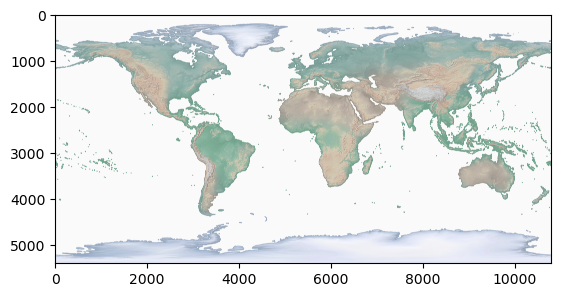

<AxesSubplot: >

In [62]:
show(image)

## Option 2: Plotly

You may use plotly. For improved visibility, transform some of the data into log-spaced. You may add these transformed Series into the Pandas, and use them as input to plotly.

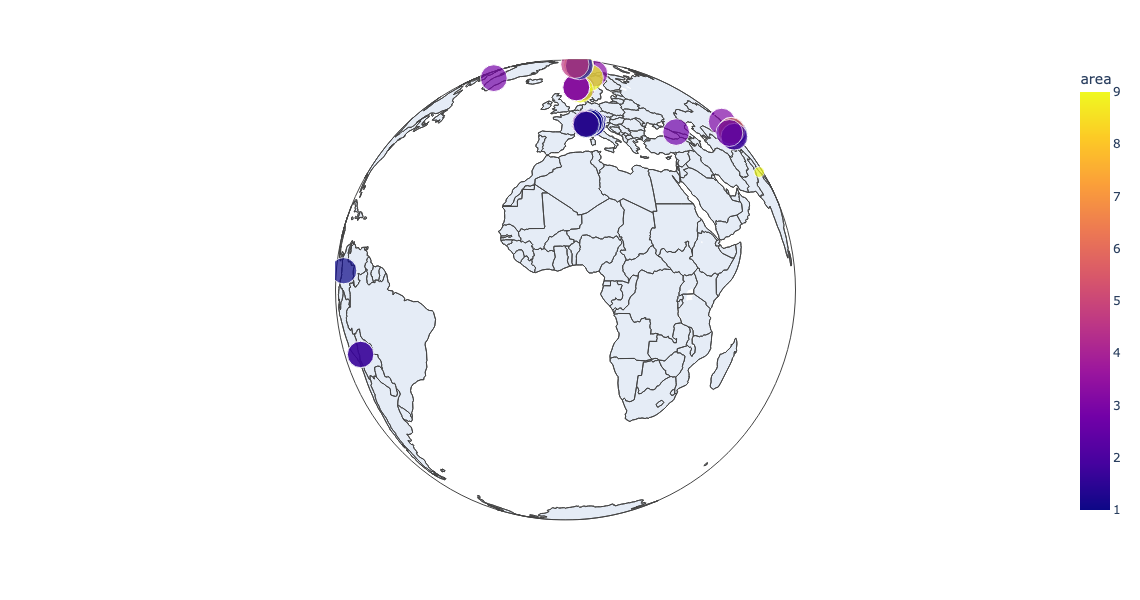

In [88]:
# solution
fig = px.scatter_geo(df,
                     lat='lat',lon='lon', 
                     range_color=(1,9),
                     height=600, width=600,
                     size='id',color='area',
                     hover_name="id",
                     hover_data=['id','area','mean_slope','mean_thickness']);
fig.update_geos(resolution=110, showcountries=True)
fig.update_geos(resolution=110, showcountries=True,projection_type="orthographic")

## 3. Correlations between data parameters ( 5 points total)

Make plots to vizualise the correlation, or lack of, between all three data. Make at least three plots.

### a) Basic correlations using Matplotlib (2 points)

Make 3 plots using matplotlib to visualize slope, mean_thickness, and area. Use logscale to see the correlatons.

__Tips__: 
* Use the function ``scatter`` to plot the values of mean thickness, mean slope, area, and latitude. 
* use one of the dataframe columns as a color using the argument ``c``. You can also vary the ``colormap`` using the argument ``cmap``. Help on colormaps can be found here: https://matplotlib.org/stable/tutorials/colors/colormaps.html. Be mindful of Color-Vision Deficient readers and read *Crameri, F., Shephard, G.E. and Heron, P.J., 2020. The misuse of colour in science communication. Nature communications, 11(1), pp.1-10. https://doi.org/10.1038/s41467-020-19160-7* (find it on the class Gdrive). You can add a third "data" by choosing a marker color that scales with an other parameter. For instance, try coloring your marker with the ``LAT`` parameter to look at systematic latitudinal trends from the equator to the poles.
* Do not forget to adjust fontsize, figure size (at least 10,8), grid, labels with units. ou may also explore the *logarithmic* correlations by mapping the axis from linear to logarithmic scale ``plt.xscale('log')``.

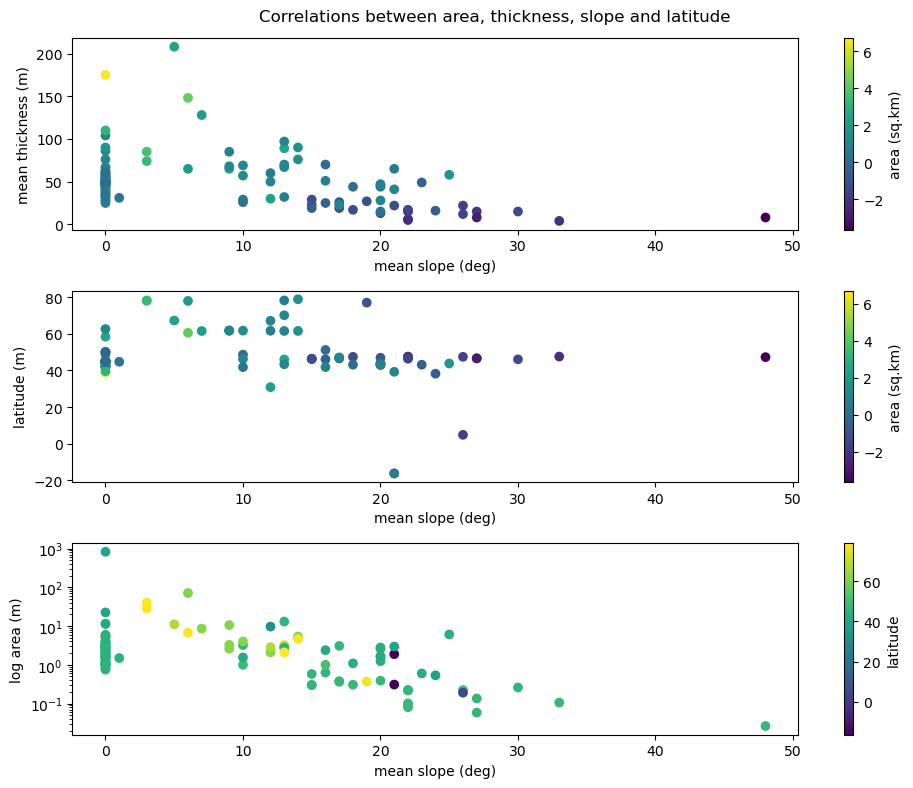

In [109]:
# Figure 1: Mean slope vs mean thickness
# solution
fig,(ax,ax1,ax2) = plt.subplots(3,1,figsize=(10,8))
plt.suptitle('Correlations between area, thickness, slope and latitude')
im = ax.scatter(df.mean_slope,df.mean_thickness,c=np.log(df.area),cmap='viridis')
ax.set_xlabel('mean slope (deg)')
ax.set_ylabel('mean thickness (m)')
# plt.yscale('log')
cbar0 = plt.colorbar(im)
cbar0.set_label('area (sq.km)')
im = ax1.scatter(df.mean_slope,df.lat,c=np.log(df.area),cmap='viridis')
ax1.set_xlabel('mean slope (deg)')
ax1.set_ylabel('latitude (m)')
# plt.yscale('log')
cbar0 = plt.colorbar(im)
cbar0.set_label('area (sq.km)')
im = ax2.scatter(df.mean_slope,df.area,c=df.lat,cmap='viridis')
ax2.set_xlabel('mean slope (deg)')
ax2.set_ylabel('log area (m)')
plt.yscale('log')
cbar0 = plt.colorbar(im)
cbar0.set_label('latitude')
fig.tight_layout()

In [ ]:
# Figure 2: area vs mean thickness
# solution

### b) 3D Scatter plot using Plotly (1 point)

Use the plotly ``scatter_3d`` plot. Make sure to change the pandas series for log scales.

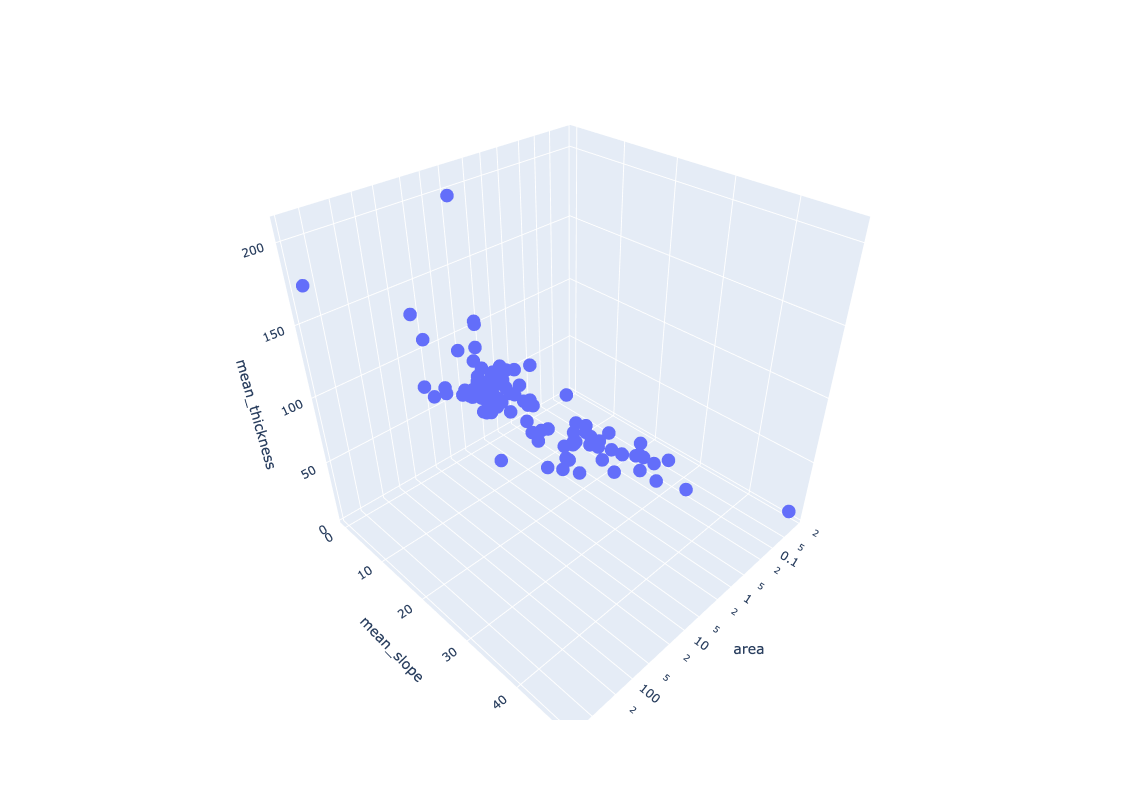

In [115]:
# solution
fig = px.scatter_3d(df,x=df.area,y=df.mean_slope,z=df.mean_thickness,
                    log_x=True,width=800, height=800);
fig.show()

### c) Pandas Correlation function (1 point)

You may use Pandas functionalities to explore correlation between data. Use the function ``corr`` on the dataframe and the matplotlib function ``matshow`` to plot a heatmap of the correlations

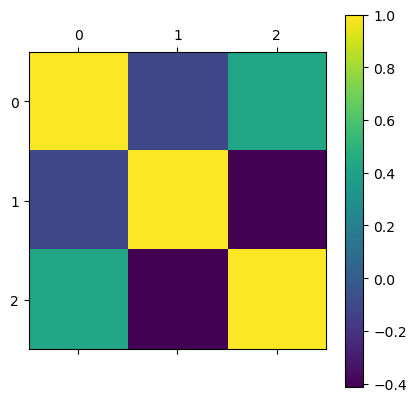

In [132]:
im = plt.matshow(df[['area','mean_slope','mean_thickness']].corr())
plt.colorbar(im)

### f) Seaborn Plotting (1 point)

Seaborn is a great python package for basic data anlytics. See documentation [here](!https://seaborn.pydata.org/).

In [ ]:
#solution

In [ ]:
# solution
import seaborn as sns


Discuss the basic correlations among the data. Do these correction make sense when you think about the shapes of glaciers?

enter text below



## 4. Linear Regression (10 points total counted in the next section)
You found from basic data visualization that the three parameters ``mean_slope``, ``mean_thickness``, and ``area`` are correlated. It does make physical sense because a *steep* glaciers is likely to be in the high mountains regions, hanging on the mountain walls, and thus be constrained, and conversely, a flat glacier is either at its valley, ocean terminus or on ice sheets.

### a) Simple linear regression (2 points)
We will now perform a regression between the parameters (or their log!). Linear regressions are models that can be imported from scikit-learn. Log/exp functions in numpy as ``np.log()`` and ``np.exp()``.
Remember that a linear regression is finding $a$ and $b$ knowing both $x$ and the data $y$ in $y = Ax +b$. We want to predict ice thickness from a crude estimate of the glacier area.

__Tips__: 
a. make sure that the dimensions are correct and that there is no NaNs and zeros.
b. Make sure to inport the scikit learn linear regression function and the error metrics.

In [ ]:
# solution
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



Make a plot of the data and the linear regression your performed

In [ ]:
# solution

**Briefly comment on the quality of your fit and a linear regression (1 point)**

The fit looks pretty good, except that there are outliers on the extreme low and high values of mean area.

### b) Leave One Out Cross Validation linear regression (1 point)


Perform the LOCCV on the ``area`` and ``thickness`` values. Predict the ``thickness`` value knowing a ``area`` value. Use material seen in class. Make a plot of your fit.

In [ ]:
from sklearn.model_selection import LeaveOneOut
# solution
loo = LeaveOneOut()

### c) Bootstrapping (1 point)

Perform the same analysis but using a bootstrapping technique. Output the mean and standard deviation of the slope. An illustration with a histogram  may help.

In [ ]:
from sklearn.utils import resample
# solution

k=100


### d) Predict the thickness of a glacier (2 points)

Let assume that you measure a glacier of area 10 km$^2$. Can you use your bootstrap regression framework to provide a distribution of possible values of the ice thickness ? Output the mean and standard deviation of the predicted ice thickness.

In [ ]:
# solution
k=100